NAME: TIA GOLYAN 

SAP ID: 500122580


ROLL NO: R2142231736


GITHUB REPO LINK: https://github.com/TiaGolyan2508/Machine-Learning

SUBMITTED TO: MR. SANTOSH PANDA

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df['Outcome'].value_counts())
print(df.isnull().sum())

Outcome
0    500
1    268
Name: count, dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)
df.fillna(df.median(numeric_only=True), inplace=True)
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


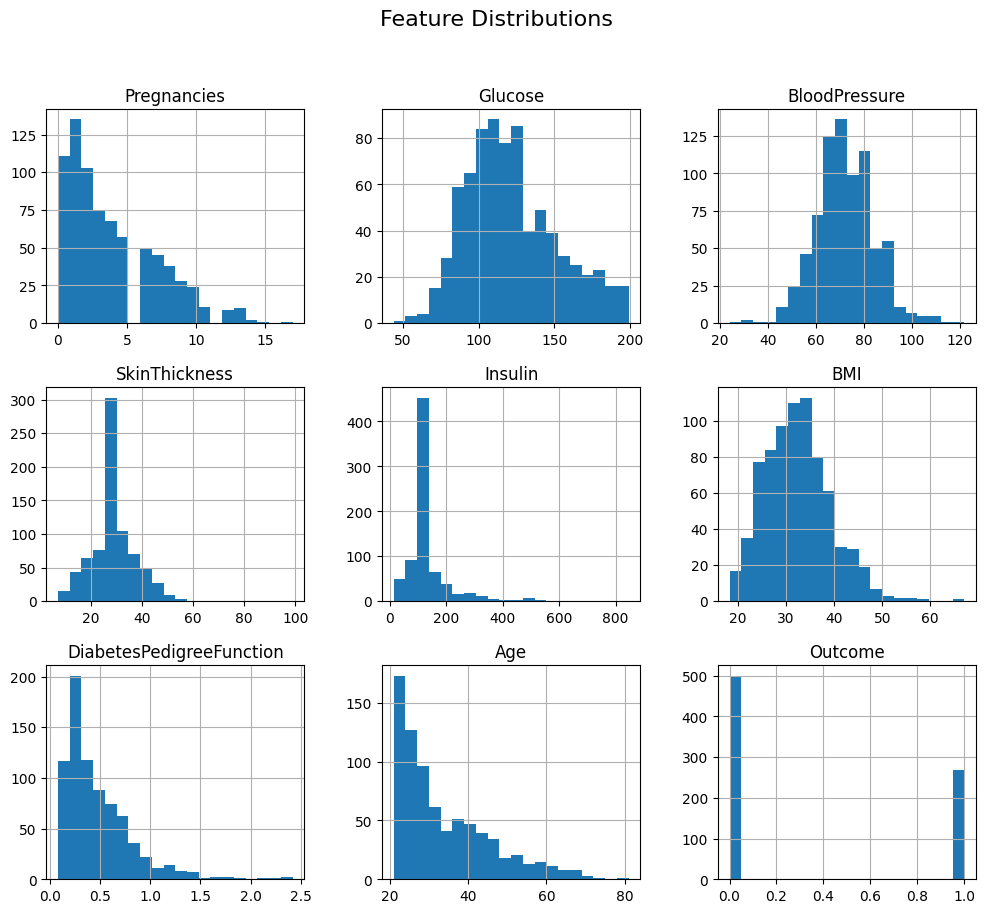

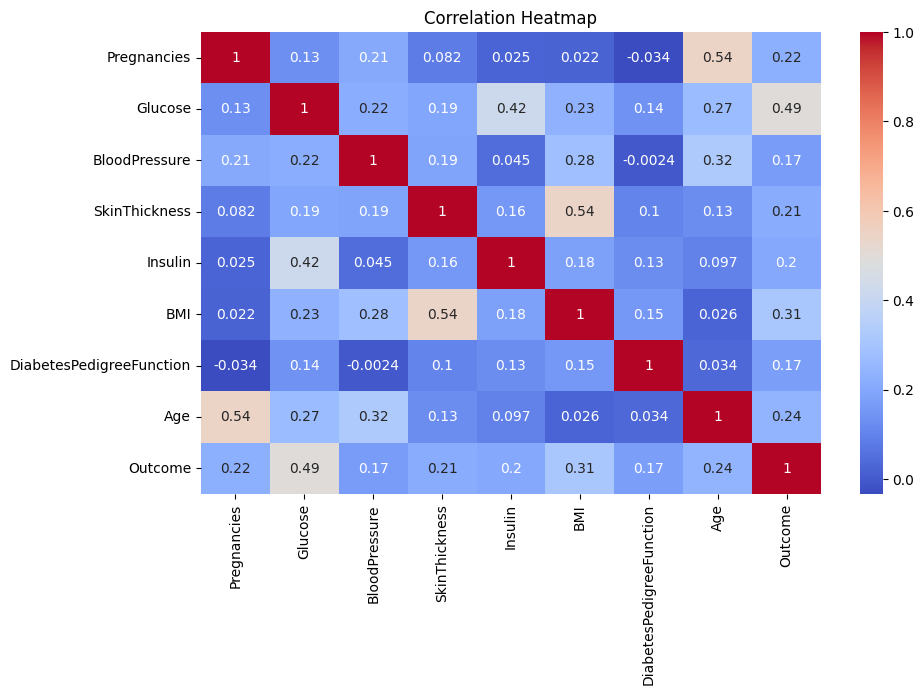

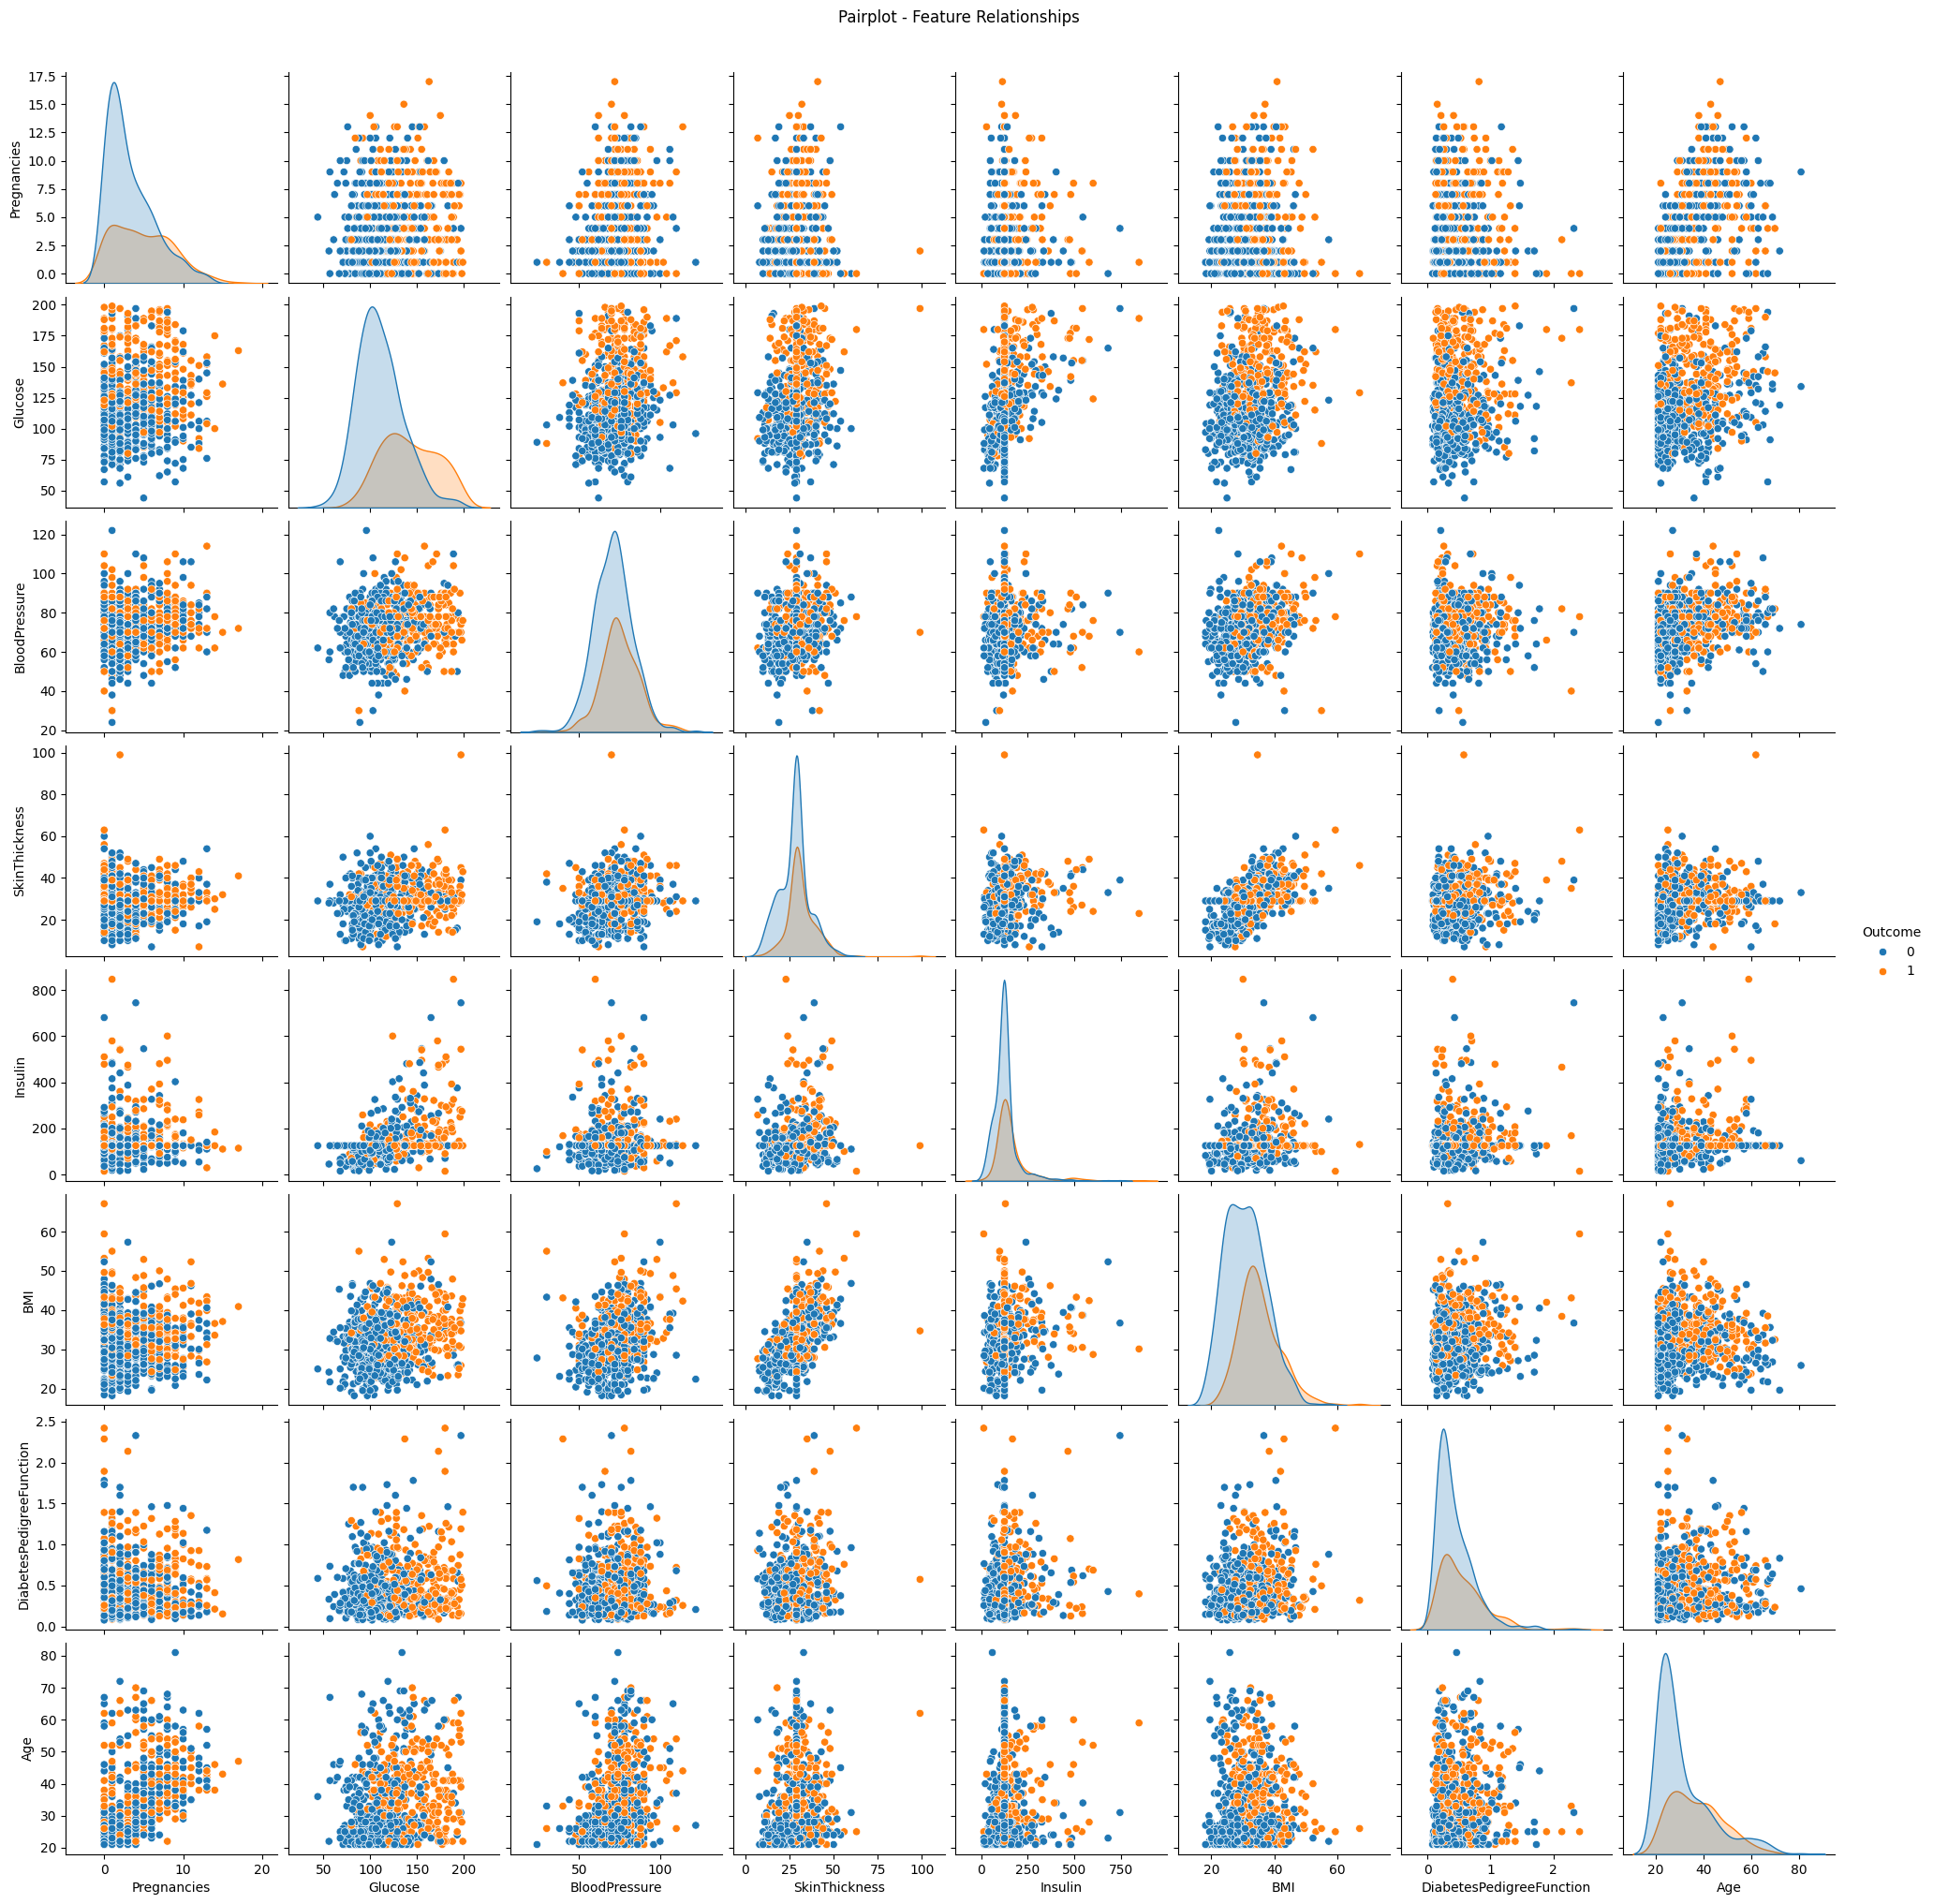

In [6]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
sns.pairplot(df, hue='Outcome')
plt.suptitle("Pairplot - Feature Relationships", y=1.02)
plt.show()

In [7]:
X = df.drop('Outcome', axis=1)  
y = df['Outcome']               

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



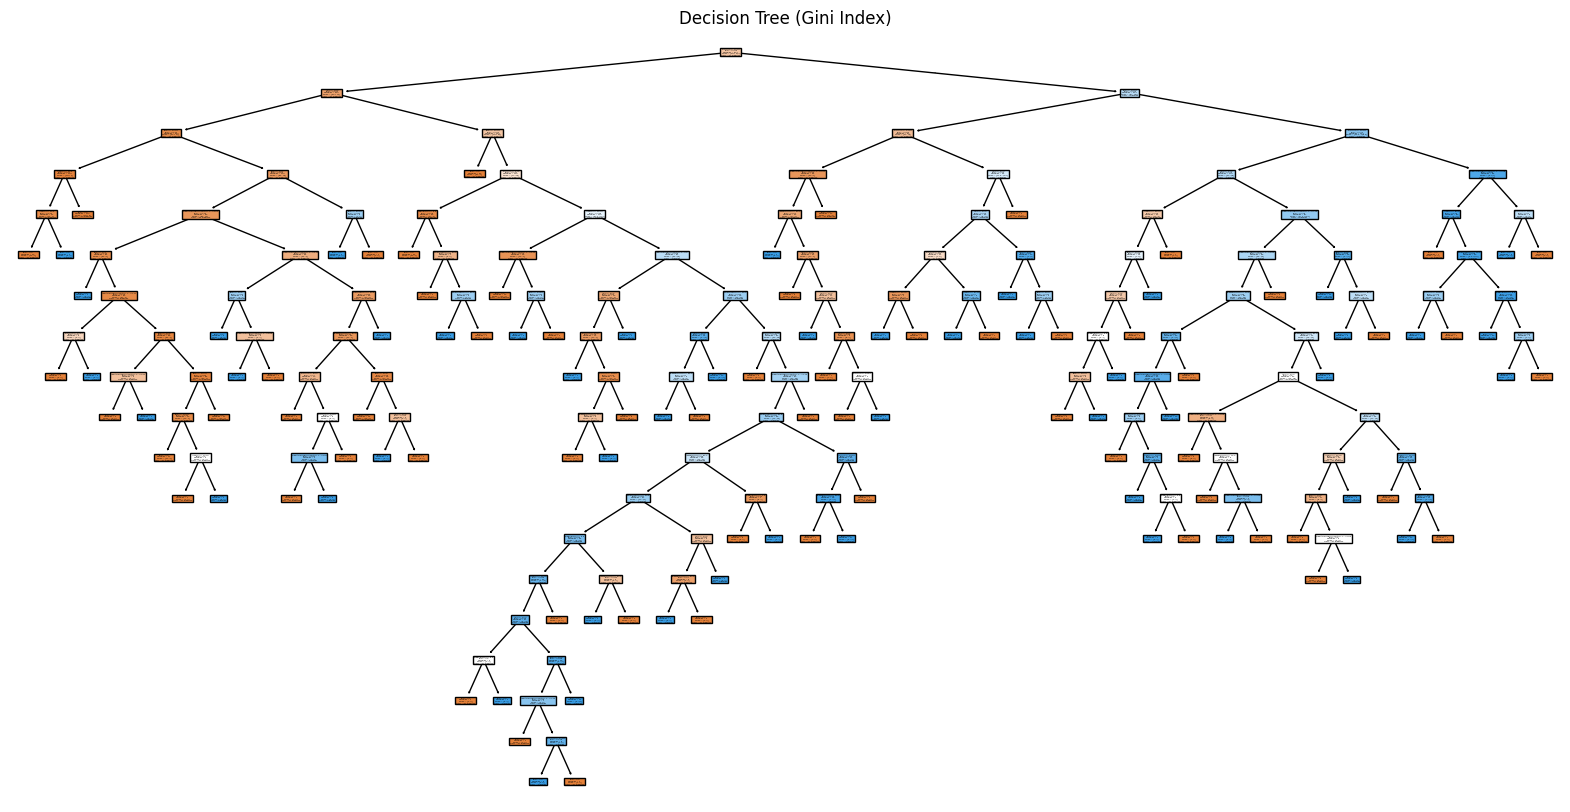

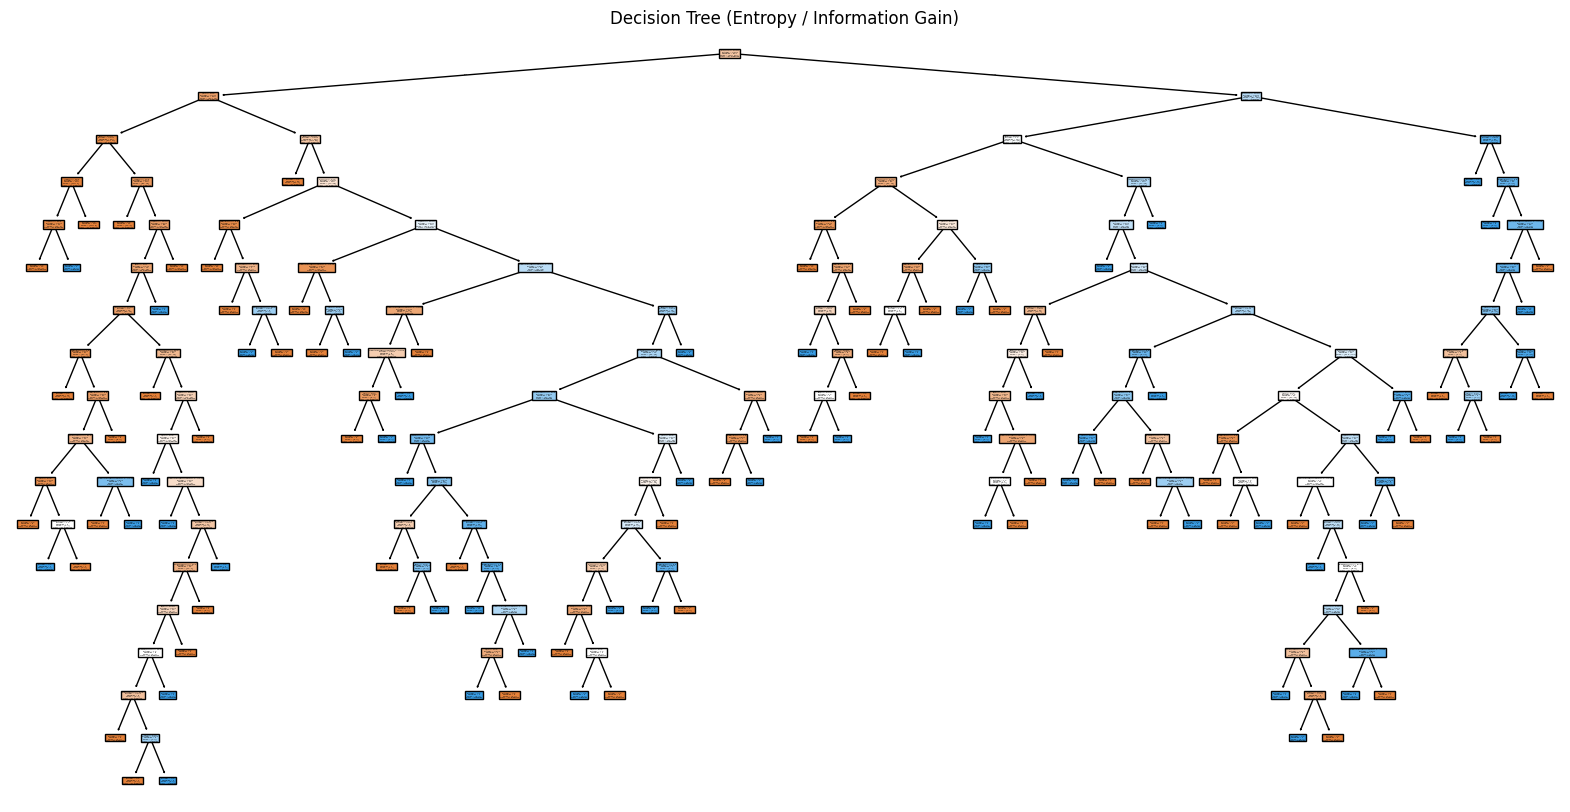

In [10]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
print("Classification Report (Gini):\n", classification_report(y_test, y_pred_gini))

plt.figure(figsize=(20, 10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree (Gini Index)")
plt.show()
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree (Entropy / Information Gain)")
plt.show()
y_pred_entropy = clf_entropy.predict(X_test)



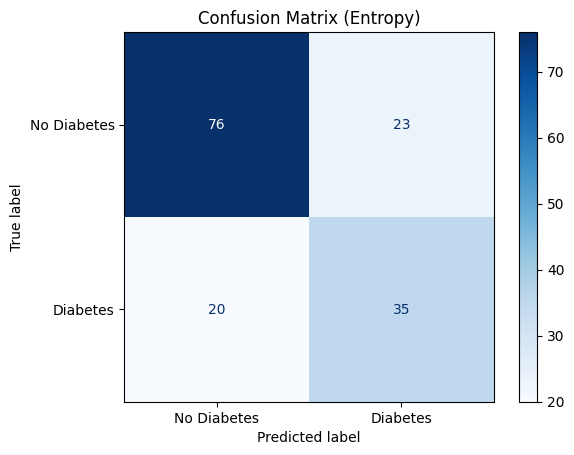

Precision: 0.60
Recall:    0.64
F1 Score:  0.62


In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Entropy)")
plt.show()

# Precision, Recall, F1-Score
print(f"Precision: {precision_score(y_test, y_pred_entropy):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred_entropy):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_entropy):.2f}")